In [1]:
import numpy as np

import matplotlib.pyplot as plt
from pandas import DataFrame

import glob
import os

## Listado de categorias y pacientes

In [2]:
path_to_dir = os.path.join(os.path.expanduser('~'), 'datasets', 'cases')

In [3]:
# List of categories

categories = sorted(set([x[0].split(os.path.sep)[-1] for x in os.walk(path_to_dir)][1:]))

In [4]:
# Is an image file is in only one categorie?
files = [file.split(os.path.sep)[-1] for file in glob.glob(os.path.join(path_to_dir, '*', '*.raw'))]
assert(len(files) == len(set(files)))

In [5]:
# List of patients
patients = sorted(set([file[0:8] for file in files]))

# R A N D O M
import random
random.shuffle(patients)

In [6]:
# Read files by categories and categories and statistics (Be patients some minutes...)

WIDTH = HEIGHT = 100

# file number?
total_files = 0
for patient in patients:
    files_by_patient = list()
    for categorie in categories:
        files_by_patient_by_categorie = [file for file in glob.glob(os.path.join(path_to_dir, f'{categorie}', f'{patient}*.raw'))]
        files_by_patient += files_by_patient_by_categorie
    total_files += len(files_by_patient)    
    
# Build data frame
data = {'patient': [], 'min': [], 'max': [], 'mean': [], 'std': [], 'len': []}
for categorie in categories:
     data[categorie] = []

# Read data 
X , Y = np.empty((total_files, WIDTH, HEIGHT), dtype=np.float32), []

i = 0
for patient in patients:
    j = i
    data['patient'] += [patient]
    files_by_patient = list()
    for categorie in categories:
        files_by_patient_by_categorie = [file for file in glob.glob(os.path.join(path_to_dir, f'{categorie}', f'{patient}*.raw'))]
        files_by_patient += files_by_patient_by_categorie
        data[categorie] += [len(files_by_patient_by_categorie)]
        Y += [[categorie]]*len(files_by_patient_by_categorie)
        
    for file_by_patient in files_by_patient:
        with open(file_by_patient, 'r') as f:
            X[i] = np.fromfile(f, dtype=np.float32).reshape(WIDTH, HEIGHT)
            i = i + 1
            
    data['len'] += [len(files_by_patient)]
    data['min'] += [np.min(X[j:i])]
    data['max'] += [np.max(X[j:i])]
    data['mean'] += [np.mean(X[j:i])]
    data['std'] += [np.std(X[j:i])]

In [7]:
# Some statistics
data_frame = DataFrame(data)
data_frame.round(0)

,patient,min,max,mean,std,len,Abdominal,Arch,Heart,RestAbdominal,RestArch,RestHeart
0,USC_0132,-1952.0,1980.0,70.0,257.0,4448,1728,1296,432,796,132,64
1,USC_0010,-2363.0,2162.0,3.0,302.0,4272,1728,1296,432,520,164,132
2,USC_0049,-4307.0,4388.0,-345.0,1157.0,3580,864,1296,864,160,328,68
3,USC_0118,-2975.0,1430.0,-56.0,602.0,3472,1296,1296,432,152,116,180
4,USC_0092,-3680.0,3732.0,-278.0,1065.0,2524,432,1296,432,56,184,124
5,USC_0011,-3405.0,2816.0,-102.0,656.0,3476,1728,1296,0,348,104,0
6,USC_0140,-4132.0,2619.0,21.0,564.0,4348,1728,1296,432,516,120,256
7,USC_0013,-3032.0,2802.0,-136.0,778.0,3144,864,1296,432,132,176,244
8,USC_0134,-3201.0,3147.0,-224.0,951.0,2548,864,864,432,172,112,104
9,USC_0005,-2436.0,2511.0,48.0,377.0,4148,1728,1296,432,404,164,124


## Build dataset

In [8]:
def build_dataset(X, Y, data_frame, val_data=0.1, test_data=0.2):
    n_data = len(data_frame)
    n_test = max(1, int(n_data*test_data)) if test_data!= 0. else 0
    n_val = max(1, int(n_data*((1.-test_data)*val_data))) if val_data!= 0. else 0
    n_train = n_data - n_val - n_test
    
    # train
    o_train = np.sum(data_frame['len'][0:n_train])
    X_train, Y_train = X[0:o_train], Y[0:o_train]
    
    # val
    o_val = np.sum(data_frame['len'][0:n_train+n_val])
    X_val, Y_val = X[o_train:o_val], Y[o_train:o_val]
        
    # test
    X_test, Y_test = X[o_val:], Y[o_val:]
    
    
    assert(np.sum(data_frame['len']) == len(X_train) + len(X_val) + len(X_test))
    assert(np.sum(data_frame['len']) == len(Y_train) + len(Y_val) + len(Y_test))
    
    return (np.expand_dims(X_train, axis=-1), Y_train), (np.expand_dims(X_val, axis=-1), Y_val), (np.expand_dims(X_test,-1), Y_test)
                          
(X_train, Y_train), (X_val, Y_val), (X_test, Y_test) = build_dataset(X, Y, data_frame, val_data=0.1, test_data=0.2)
X_train.shape, X_val.shape, X_test.shape, len(Y_train), len(Y_val), len(Y_test)

((76624, 100, 100, 1),
 (5200, 100, 100, 1),
 (19248, 100, 100, 1),
 76624,
 5200,
 19248)

In [9]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(Y)

y_train = enc.transform(Y_train).toarray()
y_val = enc.transform(Y_val).toarray()
y_test = enc.transform(Y_test).toarray()

## Some displays

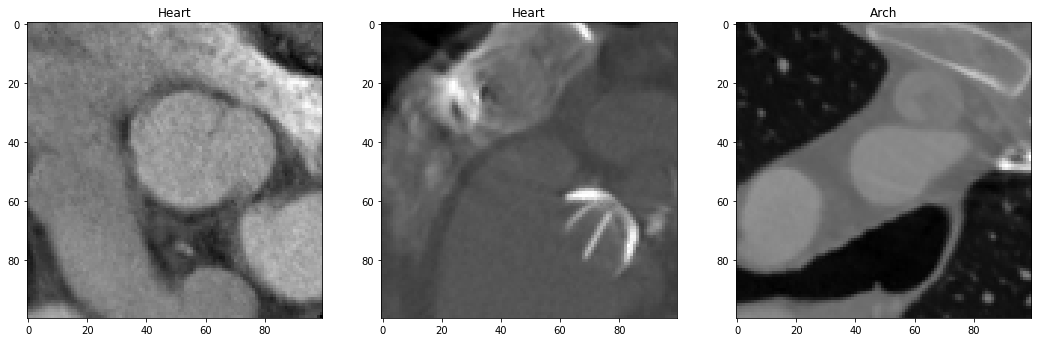

In [10]:
# display random image
import random
fig = plt.figure(figsize=(3*6, 6))

fig.add_subplot(1, 3, 1)
n = random.randint(0, len(X_train))
plt.imshow(X_train[n,...,0], cmap='gray')
plt.title(Y_train[n][0])

fig.add_subplot(1, 3, 2)
n = random.randint(0, len(X_val))
plt.imshow(X_val[n,...,0], cmap='gray')
plt.title(Y_val[n][0])

fig.add_subplot(1, 3, 3)
n = random.randint(0, len(X_test))
plt.imshow(X_test[n,...,0], cmap='gray')
plt.title(Y_test[n][0])

plt.show()

## Models

In [11]:
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2
from tensorflow.keras.applications.densenet import DenseNet121, DenseNet169, DenseNet201
from tensorflow.keras.applications.nasnet import NASNetLarge

from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model

# from tensorflow.keras.utils import multi_gpu_model
# parallel_model = multi_gpu_model(model, gpus=2)
# parallel_model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy', 'mse'])

/home/carmelo/anaconda3/envs/tf-gpu/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/carmelo/anaconda3/envs/tf-gpu/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/carmelo/anaconda3/envs/tf-gpu/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/carmelo/anaconda3/envs/tf-gpu/lib/pyt

## Vgg16
![Vgg16](vgg16.png)
## ResNet 50
![ResNet50](resnet50.png)

In [12]:
BATCH_SIZE=8


models = [
    # Xception,
    VGG16,
    # VGG19,
    ResNet50,
    # InceptionV3,
    # InceptionResNetV2,
    # DenseNet121,
    # DenseNet169, DenseNet201,
    #NASNetLarge
]

for i, f in enumerate(models):
        
    model_name = f'model{i}.h5'
    
    if os.path.isfile(model_name):
        print(f'Loading model {model_name}')
        model = load_model(model_name)
    else:
        print(f'Creating model {model_name}')
        model = f(include_top=True, weights=None, input_shape=(WIDTH, WIDTH, 1), classes=len(categories))
        model.compile(optimizer=SGD(lr=0.0001, nesterov=True), loss='categorical_crossentropy', metrics=['accuracy', 'mse'])
    # model.summary()
    
    callbacks = [EarlyStopping(monitor='val_loss', patience=8, verbose=1),
                 ModelCheckpoint(model_name, monitor='val_loss', verbose=1, save_best_only=True,
                                 save_weights_only=False, mode='auto')]
    history = model.fit(x=X_train[0:], y=y_train[0:],
                    batch_size=BATCH_SIZE,
                    epochs=36, verbose=1,
                    callbacks=callbacks, validation_data=(X_val, y_val),
                    shuffle=True)

Creating model model0.h5
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Train on 76624 samples, validate on 5200 samples
Epoch 1/36
76616/76624 [============================>.] - ETA: 0s - loss: 0.4494 - acc: 0.8498 - mean_squared_error: 0.0397
Epoch 00001: val_loss improved from inf to 0.40392, saving model to model0.h5
76624/76624 [==============================] - 646s 8ms/sample - loss: 0.4494 - acc: 0.8498 - mean_squared_error: 0.0397 - val_loss: 0.4039 - val_acc: 0.8379 - val_mean_squared_error: 0.0367
Epoch 2/36
76616/76624 [============================>.] - ETA: 0s - loss: 0.2481 - acc: 0.9078 - mean_squared_error: 0.0234
Epoch 00002: val_loss did not improve from 0.40392
76624/76624 [==============================] - 632s 8ms/sample - loss: 0.2481 - acc: 0.9078 - mean_squared_error: 0.0234 - val_loss: 0.4311 - val_acc: 0.8613 - val_mean_squared_error: 0.0360
Epoch 3/36
76616/76624 [=========================

76616/76624 [============================>.] - ETA: 0s - loss: 0.4010 - acc: 0.8551 - mean_squared_error: 0.0376
Epoch 00012: val_loss did not improve from 0.42257
76624/76624 [==============================] - 672s 9ms/sample - loss: 0.4010 - acc: 0.8551 - mean_squared_error: 0.0376 - val_loss: 0.4594 - val_acc: 0.8523 - val_mean_squared_error: 0.0399
Epoch 13/36
76616/76624 [============================>.] - ETA: 0s - loss: 0.3894 - acc: 0.8585 - mean_squared_error: 0.0367
Epoch 00013: val_loss did not improve from 0.42257
76624/76624 [==============================] - 672s 9ms/sample - loss: 0.3895 - acc: 0.8585 - mean_squared_error: 0.0367 - val_loss: 0.4576 - val_acc: 0.8563 - val_mean_squared_error: 0.0402
Epoch 14/36
76616/76624 [============================>.] - ETA: 0s - loss: 0.3859 - acc: 0.8614 - mean_squared_error: 0.0360
Epoch 00014: val_loss did not improve from 0.42257
76624/76624 [==============================] - 672s 9ms/sample - loss: 0.3859 - acc: 0.8613 - mean_squ

In [13]:
from sklearn.metrics import confusion_matrix

print(enc.categories_)

for file in glob.glob('*.h5'):
    model = load_model(file)
    print(file)
    print('*'*79)
    for x, y_true in [(X_train, y_train), (X_val, y_val), (X_test, y_test)]:
        print('+'*79)
        results = model.evaluate(x, y_true, verbose=0)
        print('loss, acc, mse: ', results)
        
        y_pred = model.predict(x)
        cm = confusion_matrix(np.argmax(y_true, axis=1), np.argmax(y_pred, axis=1), normalize=None)
        print(cm)
        print('\n')
        cm = confusion_matrix(np.argmax(y_true, axis=1), np.argmax(y_pred, axis=1), normalize='true').round(2)
        print(cm)
        print('+'*79)
    print('*'*79)

[array(['Abdominal', 'Arch', 'Heart', 'RestAbdominal', 'RestArch',
       'RestHeart'], dtype=object)]
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
model1.h5
*******************************************************************************
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
loss, acc, mse:  [0.33563615850704076, 0.871411, 0.03202752]
[[22284     1     1  2338     0     0]
 [   68 33469    17     2   135     5]
 [    0     0  7771     0     0     5]
 [ 2980     0     0  2472     0     0]
 [   37  2728    18     2   228     3]
 [    1    42  1470     0     0   547]]


[[0.9  0.   0.   0.09 0.   0.  ]
 [0.   0.99 0.   0.   0.   0.  ]
 [0.   0.

In [ ]:
# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()